#  Intelligence Artificielle Avancée
# TP3- Évaluation des performances dans l'apprentissage automatique

## Classification supervisée et validation croisée

Dans cette partie, nous allons voir comment évaluer les perforamnces d'un modèle de classification en utilisant la méthode de validation croisée (k-fold-cross-validation).

## Validation croisée (et retours des Digits)

### a) Récupération  des données Digits

Les données sur les voitures étant trop simples pour apprécier la puissance des arbres de décision, nous allons en utiliser un autre : les *digits* du TP précédent.

In [1]:
from sklearn.datasets import load_digits  #importation de la commande
digits = load_digits()
X = digits.data
y = digits.target

### b) Apprentissage d'un arbre de décision

Si vous avez été curieux, vous avez peut-être déjà tester ça dans le TP précédent :

In [2]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
help(clf)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ra

Il y a donc 13 paramètres d'initialisation pour le classifieur (Arbre de Décision). On se propose d'étudier l'impact de 3 d'entre eux  sur l'apprentissage :
- *criterion* qui par défaut vaut 'gini' mais peut-valoir aussi 'entropy'
- *max_depth* qui permet d'élaguer l'arbre en arrêtant l'appel récursif de l'algorithme d'apprentissage quand le noued courant est à cette profondeur
- *max_leaf_nodes* qui élague aussi l'arbre en ne gardant au maximum que ce nombre de feuilles (celles les plus pures, c'est à dire avec le moins de données de différentes classes)

Il est temps de voir si vous avez compris jusque là. Il vous faut : mettre de coté 25% des données pour le test, créer un classifieurs à base d'arbres de décision, apprendre sur les données d'entrainement, calculer le taux de bonne classification, et les différentes variantes du F-score sur les 10 classes de digits en utilisant les données de test.

X_train shape (1347, 64)
y_train shape (1347,)
X_test shape (450, 64)
y_test shape (450,)
Le taux de bonne classification: 0.8577777777777778

Matrice de confusion:



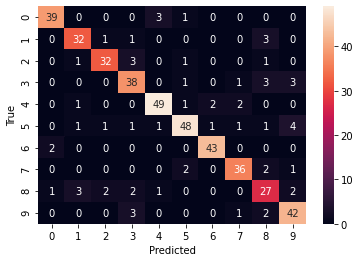

In [3]:
# A vous
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# production de deux sous-échantillon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# On apprend le modele sur les donnees d'entrainement
clf.fit(X_train, y_train)
# Prediction sur les donnees d'entrainement
y_pred = clf.predict(X_test)
print('Le taux de bonne classification:', clf.score(X_test, y_test))

print('\nMatrice de confusion:\n')
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(matrix,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Maintenant que nous avons mesuré la qualité pour les valeurs par défaut des paramètres, nous allons réaliser de la **validation-croisée** sur l'ensemble d'apprentissage (*train*). Une fois qu'on aura trouvé les meilleurs paramètres, on apprendra un arbre sur l'ensemble complet d'apprentissage avec ces paramètres et on évaluera la qualité de cet apprentissage final sur l'ensemble de test.

On commence par évaluer l'impact du critère de choix du test (*criteriom*). Pour cela on va calculer la moyenne du taux de réussite ainsi que l'[intervalle de confiance](https://fr.wikipedia.org/wiki/Intervalle_de_confiance#cite_note-7). La fonction *cross_val_score* va réaliser la validation croisée et nous renvoyer un tableau contenant les différentes valeurs obtenues (une pour chaque folder utiliser en test). On peut alors calculer la moyenne (*mean*) et la borne de son intervalle de confiance. 

Pour rappel, pour une moyenne calculer sur *n* valeurs, l'intervalle de confiance à 95% est :
$$[moyenne - 1.96*ecart\_type/\sqrt(n), moyenne + 1.96*ecart\_type/\sqrt(n)]$$  

In [4]:
from sklearn.model_selection import cross_val_score
import numpy as np
clf_gini = DecisionTreeClassifier()
reussite_gini = cross_val_score(clf_gini, X_train, y_train, cv = 10)
f1_gini = cross_val_score(clf_gini, X_train, y_train, cv = 10, scoring='f1_macro')
print("Pour le gini :\n \t taux de réussite : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_gini.mean(), 1.96*reussite_gini.std()/np.sqrt(10), f1_gini.mean(), 1.96*f1_gini.std()/np.sqrt(10)) )

clf_entropy = DecisionTreeClassifier(criterion='entropy')
reussite_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10)
f1_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10, scoring='f1_macro')
print("Pour l'entropie :\n \t taux de réussite : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_entropy.mean(), 1.96*reussite_entropy.std()/np.sqrt(10), f1_entropy.mean(), 1.96*f1_entropy.std()/np.sqrt(10)) )

Pour le gini :
 	 taux de réussite : 0.834456 (+/-) 0.015625
       	 F-score (global) : 0.836165 (+/-) 0.021105
 
Pour l'entropie :
 	 taux de réussite : 0.838933 (+/-) 0.018733
       	 F-score (global) : 0.843745 (+/-) 0.020577
 


Qu'en déduire ? Est-ce que l'entropie est statistiquement meilleure sur ce jeu de données ? Choisir un critère : ce sera le seul qui sera utilisé par la suite.

Il faut maintenant regarder l'impact des 2 autres paramètres : 
- *max_depth* que l'on fera varier entre entre 5 et 20
- *max_leaf_nodes* qu'on veut faire varier entre 20 et 200 par paliers de 20 (c'est-à-dire 20, 40, 60, ..., 200).
On se propose d'étudier l'impact de ces paramètres de manière indépendante, avec l'entropie comme critère de sélection.

Il faudra produire 4 courbes montrant les évolutions du taux de réussite et du F-score global avec chacun des paramètres. Il faudra aussi faire apparaitre l'écart type sur sur les courbes : l'utilisation de la fonction pyplot ** *errorbar* **(https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.errorbar) est vivement conseillée.

In [5]:
# A vous

Choisir les valeurs "optimales" des 3 paramètres et les utiliser pour apprendre un arbre de décition sur l'intégralité de l'ensemble d'entrainement, puis évaluer la qualité de l'apprentissage sur l'ensemble de test.

In [6]:
# A vous

## Régression et évaluation de performance

* modéliser des relations statistiques entre deux variables

* estimer l'impact de la variation d'une variable explicative sur une variable à expliquer

* modèle : $y = f(x) + \epsilon$

### I. Régression linéaire

* $f(x) = \langle x, \beta \rangle = \sum_{i=1}^d x_i \beta_i$

* estimer le vecteur de paramètre $\beta$

#### I.1. Données simulées

a) Générez $n$ données suivant le modèle : $y^{(i)} = \beta_0 + \beta_1 x^{(i)} + \epsilon^{(i)}$, avec $\beta_0,\beta_1 \in \mathbb{R}$ et $\epsilon^{(i)}$ un terme d'erreur qui suit une loi normale avec une moyenne nulle et une variance $\sigma$.  Stockez les données d'entrée dans une variable $X$ et les données de sortie dans une variable $y$. La variable $X$ est une matrice de dimension $n \times 2$, contenant les $n$ valeurs $x^{(i)}$ dans la 1ère colone et un vecteur dont toutes les valeurs sont égales à 1 dans la deuxième colone. La variable $y$ est un vecteur de dimension $n$ contenant les valeurs $y^{(i)}$. Affichez les données ($y^{(i)}$ en fonction de $x^{(i)}$). Variez le terme d'erreur (le paramètre $\sigma$) et commentez.

In [7]:
# A vous

b) Calculer la solution obtenue par une régression linéaire à moindres carrés et dessiner la droite de régression sur la même figure que les données.

In [8]:
# A vous

c) Reprenez la question précédente mais utiliser le module `LinearRegression` de `Scikit-Learn`.

In [9]:
# A vous

#### I.2. Données réelles

On va utiliser dans cette partie le jeu de données Boston. Pour télécharger le jeu de données, exécutez les deux lignes de code suivantes :

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()

a) Exécutez les instructions ci-dessous et commentez.

In [11]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
# A vous
# dict_keys renvoie un dictionnaire donnant accès aux informations sur les données : les données, les features, ect

In [13]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [14]:
# A vous
# cette commande renvoie les noms des variables

In [15]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [16]:
# A vous
# le jeu de données contient 506 instances pour 13 attributs

In [17]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
# A vous
# C'est la description detaillee du jeu de donnees

b) Découpez les données en Train et Test. Apprenez une régression linéaire sur les données Train, afficher les paramètres de régression appris et évaluez ses performances sur les données Test. Utilisez l'erreur quadratique moyenne (MSE) et le coefficient R2 comme mesure d'erreur.

In [28]:
# A vous
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# production de deux sous-échantillon
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=42) 
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('r_squarred :', reg.score(X_test, y_test))

X_train shape (379, 13)
y_train shape (379,)
X_test shape (127, 13)
y_test shape (127,)
r_squarred 0.6844267283527139


### II Régression non-linéaire

On s'intéresse maintenant à la régression non-linéaire. 

Générez des données suivant le modèle : $y_n = \sin(\frac{n}{10}) +(\frac{n}{50})^2 + \epsilon $ avec $X$ contenant tous les entiers entre 1 et 99 et epsilon variant comme dans la partie précédente. 

Affichez les données.

Pour approcher le problème, nous allons utiliser une régression polynomiale :

* $y = \beta + \alpha_1 x + \alpha_2 x^2 +\alpha_3 x^3$,

* la solution d'une régression linéaire : $\hat{\alpha} = (X^\top X)^{-1} X^\top Y$,

* la matrice $X = [1 \ x \ x^2 \ x^3]$.

a) Générez la matrice des variables explicatives $X$ définie ci-dessus.

In [20]:
# A vous

b) Réalisez une régression linéaire avec la matrice $X$ contenant les variables explicatives et le vecteur $y$ contenant les variables à expliquer. Affichez l'estimation des paramètres de régression.

In [21]:
# A vous

c) Affichez la solution de la régression polynomiale obtenue et vérifiez si elle est une meilleur estimation que la régression linéaire.

In [22]:
# A vous